In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std


# for visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot


# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# SVC
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGB
from xgboost import XGBClassifier
# LGBM
from lightgbm import LGBMClassifier
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
# Neural Network
from sklearn.neural_network import MLPClassifier


# Processing
import imblearn
from imblearn.over_sampling import SMOTE # for balancing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold, learning_curve, RepeatedStratifiedKFold
from sklearn.metrics import recall_score, precision_score, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn import metrics, preprocessing, tree

In [ ]:
#Load the dataset
#upload file into google colab session from github account where the dataset has been uploaded
df = pd.read_csv("https://raw.githubusercontent.com/itsamemonisha/DataMiningProject/main/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#swiftball
df = pd.read_csv('/content/The Eras Tour Outfits - Outfits.csv', header = 1)
df = df.drop('#', axis = 1)
df = df.dropna()
#drop 36 to 101

In [ ]:
df

,City,Date,Lover \n(Bodysuit),The Man (Jacket),Lover (Guitar),Fearless\n(Tassels),evermore,reputation,Speak Now\n(Dress),Red (Shirt),Red (Romper),ATW (Robe),ATW10 (Guitar),folklore,1989,Surprise,Midnights (Shirt),Midnights,Midnights (Garter),Karma (Jacket)
0,"Glendale, AZ","Fri, Mar 17, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Red,Purple,Pink,Pink,Silver,Lines,No,Purple (multi)
2,"Las Vegas, NV","Fri, Mar 24, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Red,Pink,Pink,Pink,Silver,Swirls,Yes,Purple (multi)
4,"Arlington, TX","Fri, Mar 31, 2023",Gold Blue,Black,Blue,Long Gold,Orange,Bodysuit,Gold,Never Ever,Red/Black,R/B,Red,White,Green,Green,Pink,Swirls,Yes,Purple (multi)
7,"Tampa, FL","Thu, Apr 13, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Sleeves,Ew,Red/Black,R/B,Black,Green,Orange,Yellow,Purple,Swirls,Fell Off,Purple (multi)
10,"Houston, TX","Fri, Apr 21, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Black,White,Orange,Yellow,Pink,Swirls,Yes,Purple (multi)
13,"Atlanta, GA","Fri, Apr 28, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,A Lot,Red/Black,R/B,Black,White,Green,Green,Silver,Swirls,Yes,Magenta
16,"Nashville, TN","Fri, May 5, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,Ew,Red/Black,R/B,Black,White,Pink,Pink,Purple,Lines,Yes,Magenta
19,"Philadelphia, PA","Fri, May 12, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,A Lot,Red/Black,R/B,Black,White,Pink,Pink,Purple,Swirls,Yes,Purple (multi)
22,"Foxborough, MA","Fri, May 19, 2023",Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,Never Ever,Red/Black,R/B,Black,Green,Orange,Yellow,Silver,Lines,Yes,Magenta
25,"East Rutherford, NJ","Fri, May 26, 2023",Purple Tassels,Silver,Pink,Short,Burgundy,Bodysuit,White,Never Ever,Red/Black,R/B,Black,White,Pink,Pink,Silver,Lines,Yes,No Jacket


In [ ]:
df = df.drop(columns = ['City', 'Date'] )
df

,Lover \n(Bodysuit),The Man (Jacket),Lover (Guitar),Fearless\n(Tassels),evermore,reputation,Speak Now\n(Dress),Red (Shirt),Red (Romper),ATW (Robe),ATW10 (Guitar),folklore,1989,Surprise,Midnights (Shirt),Midnights,Midnights (Garter),Karma (Jacket)
0,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Red,Purple,Pink,Pink,Silver,Lines,No,Purple (multi)
2,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Red,Pink,Pink,Pink,Silver,Swirls,Yes,Purple (multi)
4,Gold Blue,Black,Blue,Long Gold,Orange,Bodysuit,Gold,Never Ever,Red/Black,R/B,Red,White,Green,Green,Pink,Swirls,Yes,Purple (multi)
7,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Sleeves,Ew,Red/Black,R/B,Black,Green,Orange,Yellow,Purple,Swirls,Fell Off,Purple (multi)
10,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,A Lot,Red/Black,R/B,Black,White,Orange,Yellow,Pink,Swirls,Yes,Purple (multi)
13,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,A Lot,Red/Black,R/B,Black,White,Green,Green,Silver,Swirls,Yes,Magenta
16,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Gold,Ew,Red/Black,R/B,Black,White,Pink,Pink,Purple,Lines,Yes,Magenta
19,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,A Lot,Red/Black,R/B,Black,White,Pink,Pink,Purple,Swirls,Yes,Purple (multi)
22,Blue Pink,Silver,Pink,Short,Orange,Bodysuit,Pink,Never Ever,Red/Black,R/B,Black,Green,Orange,Yellow,Silver,Lines,Yes,Magenta
25,Purple Tassels,Silver,Pink,Short,Burgundy,Bodysuit,White,Never Ever,Red/Black,R/B,Black,White,Pink,Pink,Silver,Lines,Yes,No Jacket


# Pre-Processing

In [ ]:
# remove columns of no obvious significance
df.drop(columns=["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
# storing variables that can be scaled and continuous variables
scale_vars =  ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
df1 = df

In [ ]:
# get_dummies for geography, and gender
df1 = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [ ]:
# scaling values
scaler = MinMaxScaler()
df1[scale_vars] = scaler.fit_transform(df1[scale_vars])

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


# Data Visualization

In [ ]:
# Churn Distribution
l_labels = ['Stayed','Exited']

colors = ['darkorange', 'lightgreen']


fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Pie(labels = l_labels,
                     values = df['Exited'].value_counts(),
                     name = ''))

fig.update_traces(hole = 0.4,
                  hoverinfo = "label+percent+name",
                  textfont_size = 16, marker=dict(colors=colors, line=dict(color='#000000', width=1)))

fig.update_layout(title_text = 'Churn Distribution')

fig.show()

In [ ]:
# Customer Gender Distribution
l_labels = ['Male','Female']

colors = ['gold', 'mediumturquoise']


fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(go.Pie(labels = l_labels,
                     values = df['Gender'].value_counts(),
                     name = ''))

fig.update_traces(hole = 0.4,
                  hoverinfo = "label+percent+name",
                  textfont_size = 16, marker=dict(colors=colors, line=dict(color='#000000', width=1)))

fig.update_layout(title_text = 'Gender Distribution')

fig.show()

In [ ]:
# Geographical Distribution
labels = df['Geography'].unique()
values = df['Geography'].value_counts()


colors = ['seagreen', 'darkmagenta']

fig = go.Figure(data = [
    go.Pie(
    labels = labels,
    values = values,
    hole = .5)
])

fig.update_layout(title_text = "Geography Distribution")
fig.show()

In [ ]:
# Churn wrt. Geography
df[df["Exited"] == 1][["Geography"]].value_counts()
labels = (df[df["Exited"] == 1][["Geography"]].value_counts())[:].index
values = df[df["Exited"] == 1][["Geography"]].value_counts()

fig = go.Figure(data = [
    go.Pie(
    labels = labels,
    values = values,
    hole = .3)
])
fig.update_layout(title_text = "Geographical Distribution % of who Exited")
fig.show()

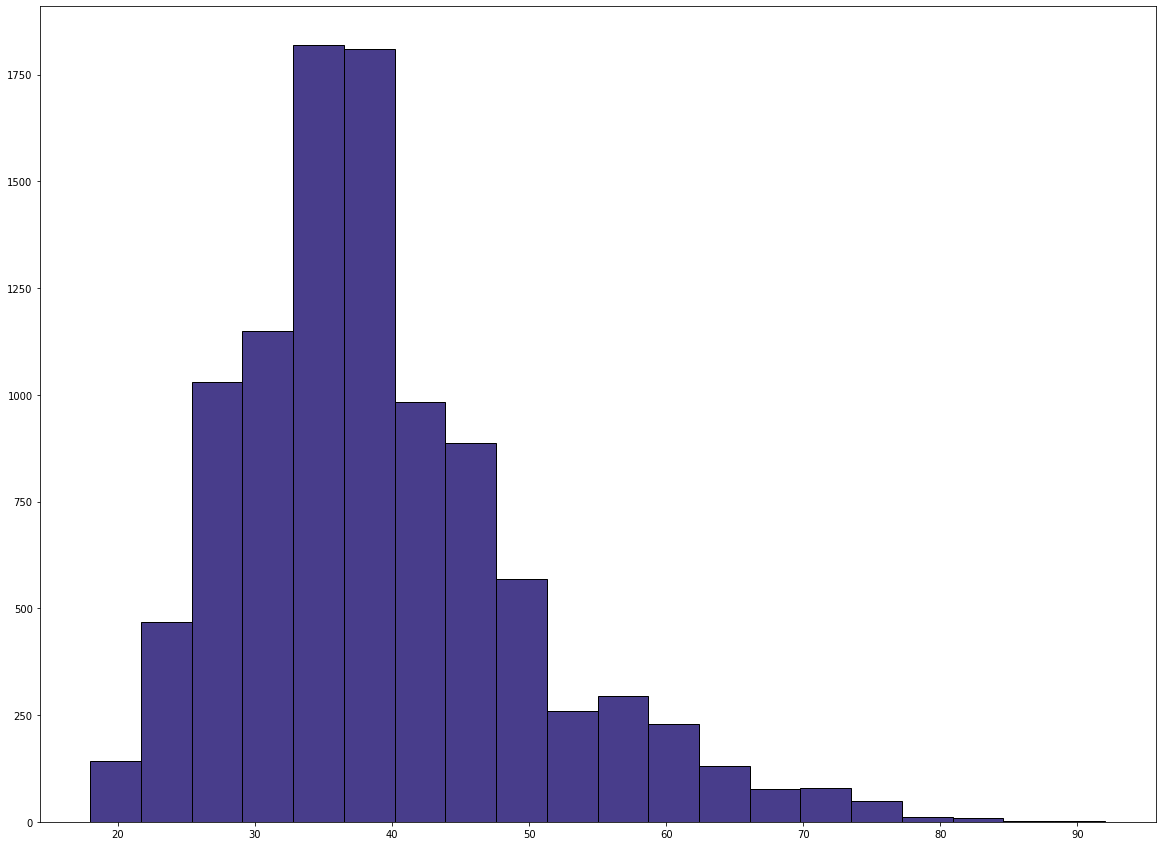

In [ ]:
# Age Distribution
df['Age'].hist(figsize=(20, 15),
                    bins=20,
                    color='darkslateblue',
                    edgecolor='black',
                    linewidth=1, grid = False);

In [ ]:
# Age and Geography wrt. Churn
fig = px.bar(df,y = "Exited", x = "Age" , color = "Geography")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: Futur

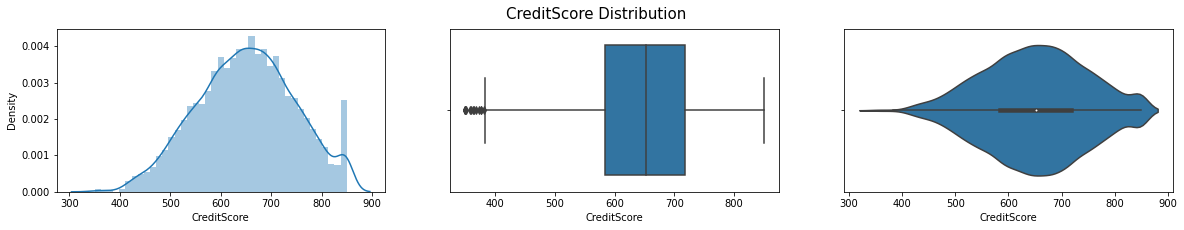

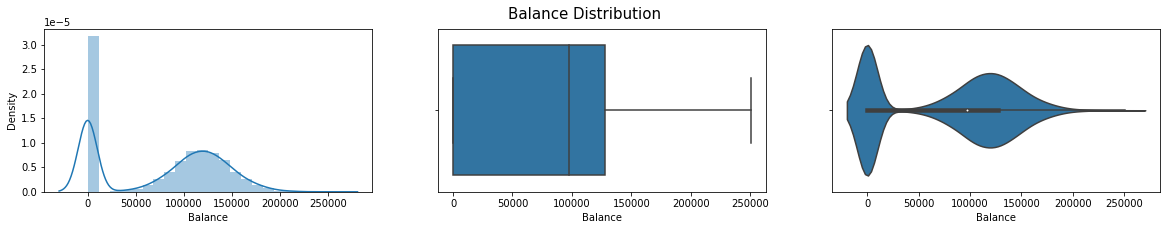

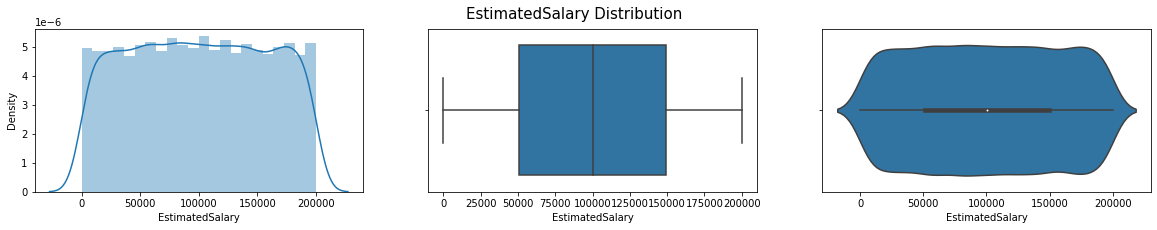

In [ ]:
# Finding the distributions of some other continuous variables
plt.rcParams["figure.figsize"] = (20,3)

fig, ax = plt.subplots(1,3)
fig.suptitle("CreditScore Distribution", fontsize=15)
sns.distplot(df["CreditScore"], ax=ax[0])
sns.boxplot(df["CreditScore"], ax=ax[1])
sns.violinplot(df["CreditScore"], ax=ax[2])


fig, ax = plt.subplots(1,3)
fig.suptitle("Balance Distribution", fontsize=15)
sns.distplot(df["Balance"], ax=ax[0])
sns.boxplot(df["Balance"], ax=ax[1])
sns.violinplot(df["Balance"], ax=ax[2])


fig, ax = plt.subplots(1,3)
fig.suptitle("EstimatedSalary Distribution", fontsize=15)
sns.distplot(df["EstimatedSalary"], ax=ax[0])
sns.boxplot(df["EstimatedSalary"], ax=ax[1])
sns.violinplot(df["EstimatedSalary"], ax=ax[2])

In [ ]:
# Churn wrt. Tenure
fig = px.box(df, x='Exited', y = 'Tenure')
fig.update_yaxes(title_text='Tenure ', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=500, height=500, title='Tenure vs Churn')
fig.update_traces(marker_color='purple')
fig.show()

In [ ]:
# Churn wrt. Active Member
colors = {1: "darkslateblue", 0: "mediumturquoise"}
fig = px.histogram(df, x="Exited", color="IsActiveMember", barmode="group", title="Churn wrt. Active Member", color_discrete_map=colors)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
# Churn wrt. Credit Card Owner
colors = {0: "darkslateblue", 1: "seagreen"}
fig = px.histogram(df, x="Exited", color="HasCrCard", barmode="group", title="Churn wrt. Credit Card Owner", color_discrete_map=colors)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<Figure size 1440x1080 with 0 Axes>

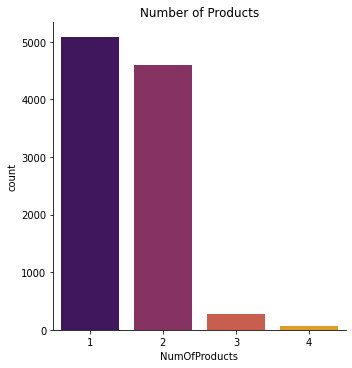

In [ ]:
# Number of Products Distributions
plt.figure(figsize = (20,15))
sns.catplot(x = "NumOfProducts", kind = 'count', palette = 'inferno', data = df )
plt.title('Number of Products')
plt.show()

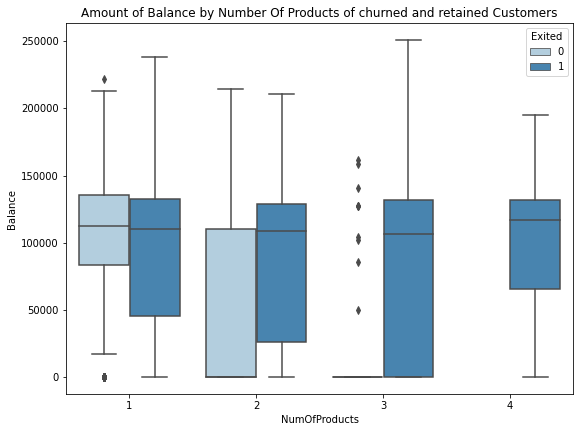

In [ ]:
# effect on churn
df.columns
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(223)

g = sns.boxplot(x = "NumOfProducts", y = "Balance", hue = "Exited",
                data = df, palette = "Blues", ax = ax)
g.set_title("Amount of Balance by Number Of Products of churned and retained Customers")

plt.show()

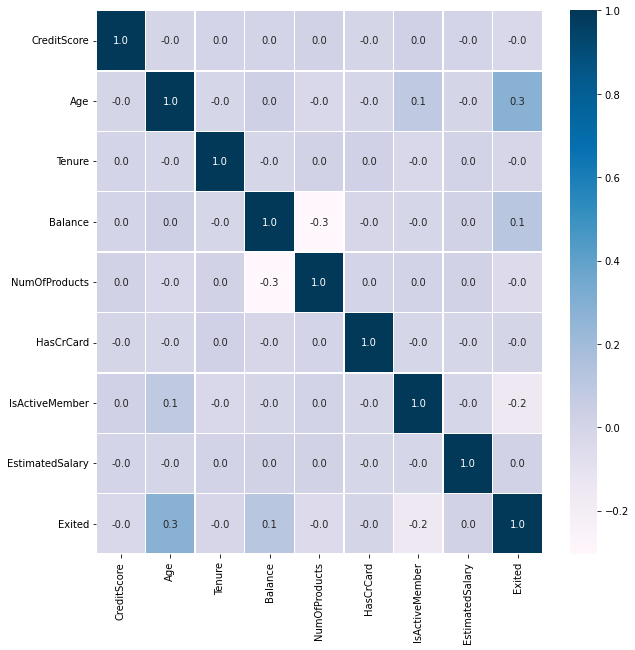

In [ ]:
# Heatmap
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = .5,
            fmt = '.1f',
            ax = ax, cmap="PuBu")

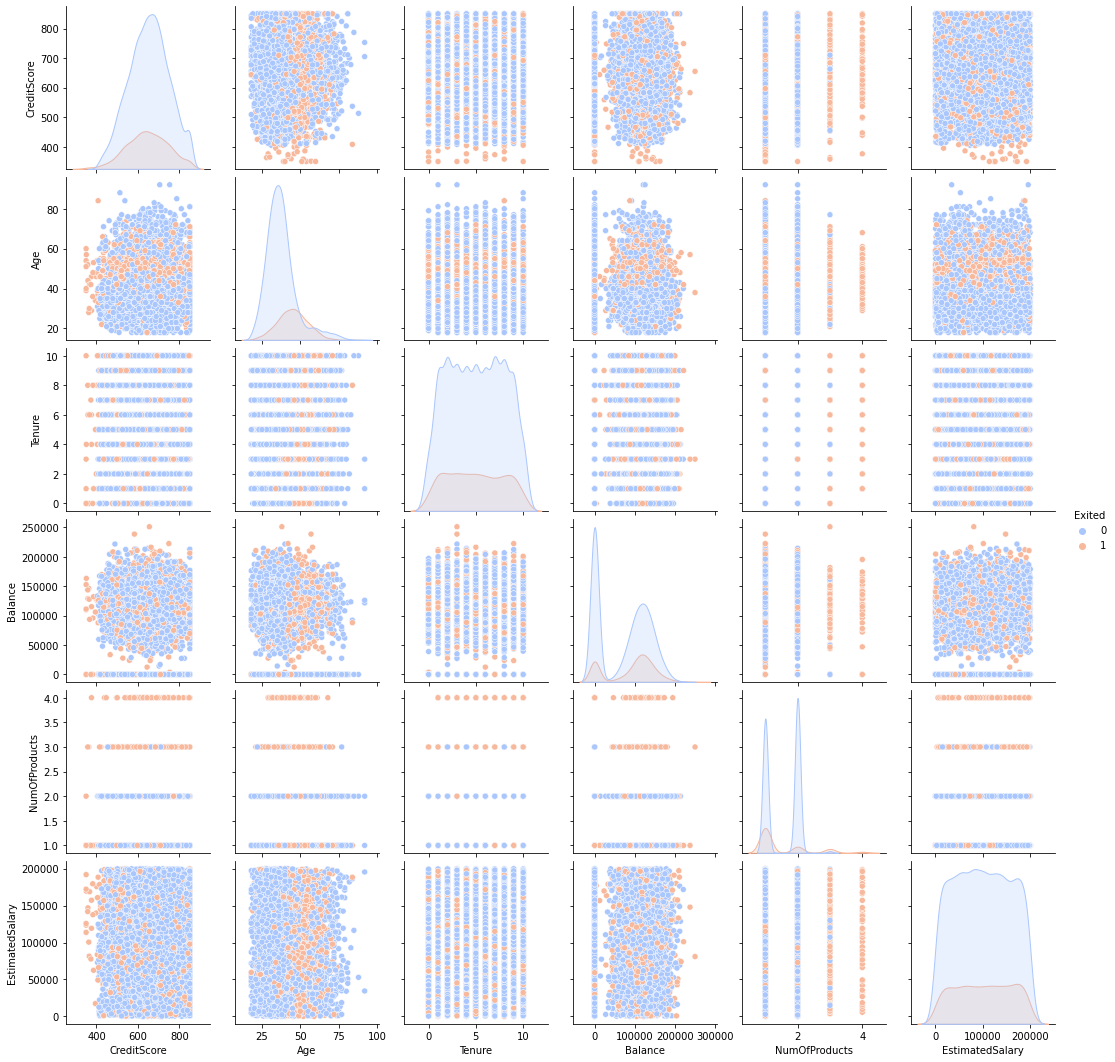

In [ ]:
# Scatter Plot Matrix
numeric = df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]];
sns.pairplot(numeric, hue="Exited", palette = "coolwarm");

#  MODEL IMPLMENTATION ✈

In [ ]:
X = df1.drop('Exited', axis = 1)

In [ ]:
y = df1['Exited']
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
# saving a copy of the original training and test splits (before smote); used to compare the models before and after balancing data
Xtr, Xt, ytr, yt = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
# Balancing Dataset
over = SMOTE(sampling_strategy='auto', random_state=3)
X_train, y_train = over.fit_resample(X_train, y_train)

y_train.value_counts()

0    6358
1    6358
Name: Exited, dtype: int64

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# prediction before dealing with class imbalance
knn.fit(Xtr, ytr)
y_pred = knn.predict(Xt)
print(classification_report(yt,  y_pred))

# prediction after dealing with class imbalance
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# comparison between the two will focus on recall because we would rather not miss out on predicting customers who might churn

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1605
           1       0.56      0.34      0.43       395

    accuracy                           0.82      2000
   macro avg       0.71      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000

[[1258  347]
 [ 167  228]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1605
           1       0.40      0.58      0.47       395

    accuracy                           0.74      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.79      0.74      0.76      2000



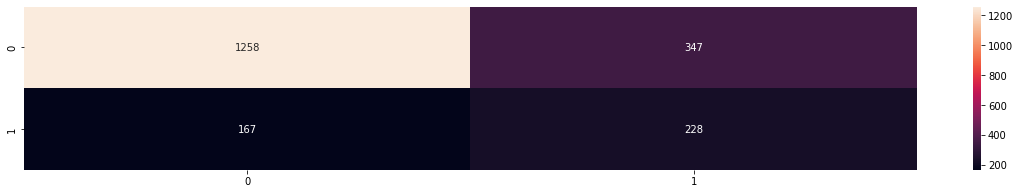

In [ ]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

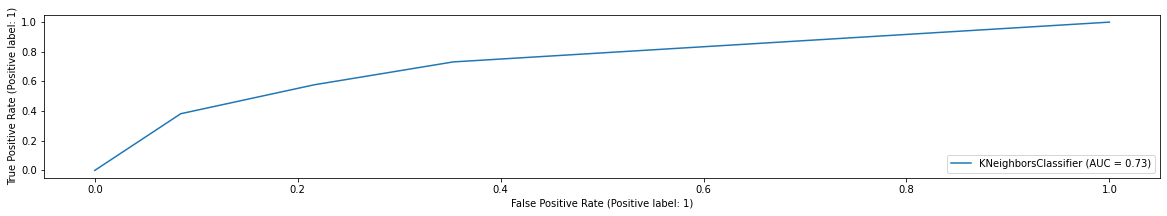

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.show()

# Logistic Regression

In [ ]:
logreg = LogisticRegression()

# prediction before dealing with class imbalance
logreg.fit(Xtr, ytr)
y_pred = logreg.predict(Xt)
print(classification_report(yt,  y_pred))

# prediction after dealing with class imbalance
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1605
           1       0.57      0.23      0.32       395

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000

[[1170  435]
 [ 129  266]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1605
           1       0.38      0.67      0.49       395

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.80      0.72      0.74      2000



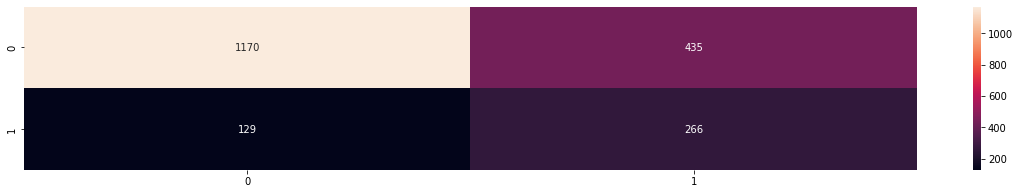

In [ ]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

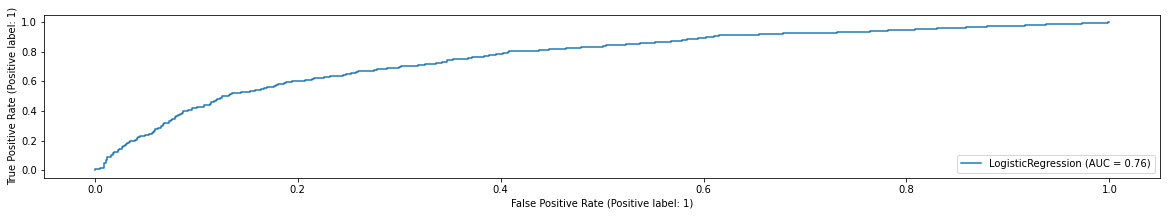

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# prediction
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test,  y_pred))

[[1194  411]
 [ 130  265]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1605
           1       0.39      0.67      0.49       395

    accuracy                           0.73      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.73      0.75      2000



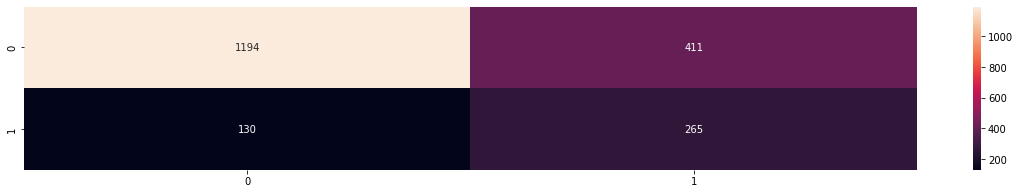

In [ ]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

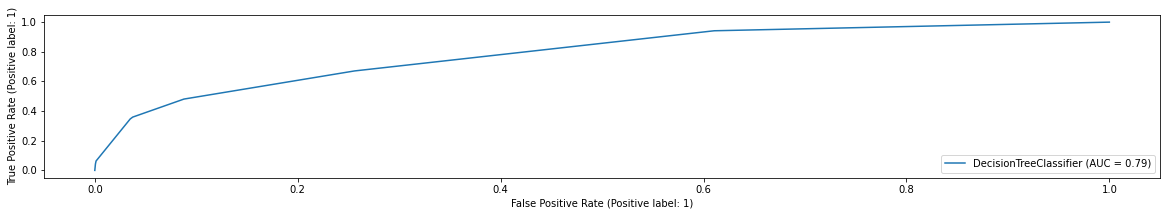

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.show()

# SVC

In [ ]:
svc = SVC(random_state = 1)

# prediction before dealing with class imbalance
svc.fit(Xtr, ytr)
y_pred = svc.predict(Xt)
print(classification_report(yt,  y_pred))

# prediction
svc = svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1605
           1       0.87      0.22      0.35       395

    accuracy                           0.84      2000
   macro avg       0.85      0.61      0.63      2000
weighted avg       0.84      0.84      0.80      2000

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1605
           1       0.47      0.67      0.55       395

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.80      2000



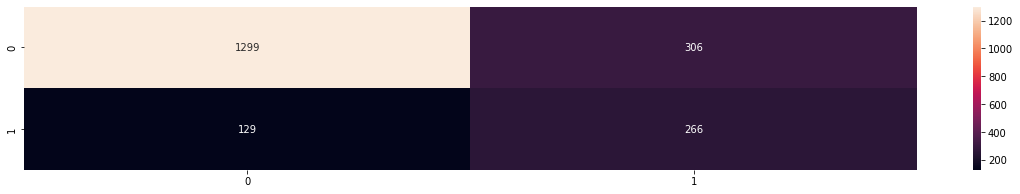

In [ ]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

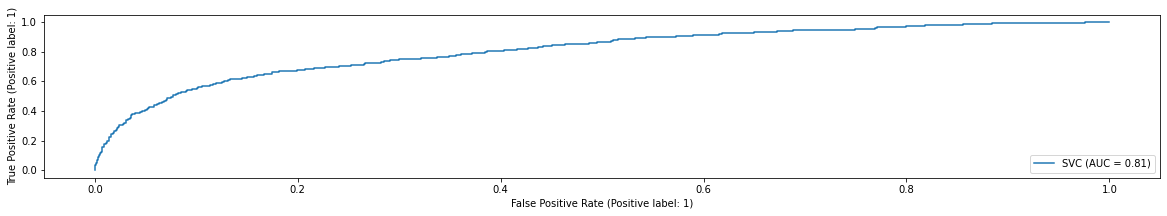

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

# Random Forest

In [ ]:
import timeit
start_time = timeit.default_timer()
rf = RandomForestClassifier(random_state=3)

# # prediction before dealing with class imbalance
# rf.fit(Xtr, ytr)
# y_pred = rf.predict(Xt)
# print(classification_report(yt,  y_pred))

# prediction
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)
print(classification_report(y_test,  y_pred))
print(timeit.default_timer() - start_time)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1605
           1       0.60      0.57      0.58       395

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.84      0.84      0.84      2000

1.743022662999465


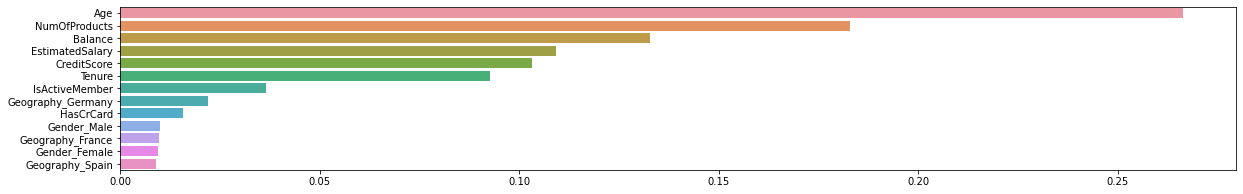

In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

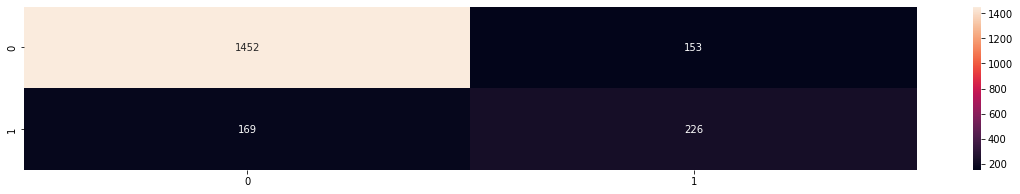

In [ ]:
sns.heatmap(cnf_matrix,annot=True,fmt="d")

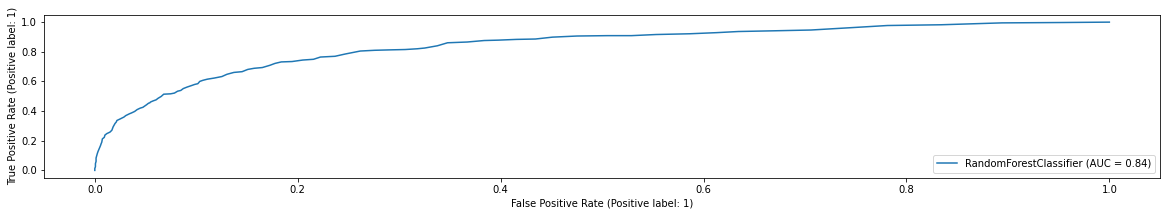

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

# Neural Network

In [ ]:
import timeit
start_time = timeit.default_timer()
clf = MLPClassifier(hidden_layer_sizes=(15,15,15), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)

# # prediction before dealing with class imbalance
# clf.fit(Xtr, ytr)
# y_pred = clf.predict(Xt)
# print(classification_report(yt,  y_pred))

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,  y_pred))
print(timeit.default_timer() - start_time)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1605
           1       0.53      0.68      0.59       395

    accuracy                           0.82      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000

27.783882516999256


[[1364  241]
 [ 126  269]]


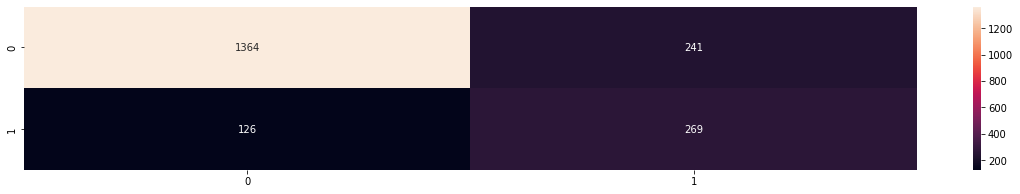

In [ ]:
# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True,fmt="d")

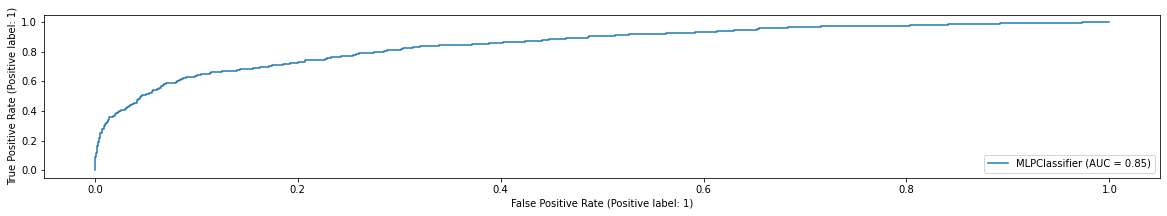

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# Gradient Boost

In [ ]:
import timeit
start_time = timeit.default_timer()
gb = GradientBoostingClassifier()


# prediction before dealing with class imbalance
# gb.fit(Xtr, ytr)
# y_pred = gb.predict(Xt)
# print(classification_report(yt,  y_pred))

gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
y_pred = gb.predict(X_test)

# evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)
print(classification_report(y_test,  y_pred))
print(timeit.default_timer() - start_time)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1605
           1       0.57      0.65      0.61       395

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.84      2000

2.3436551529994176


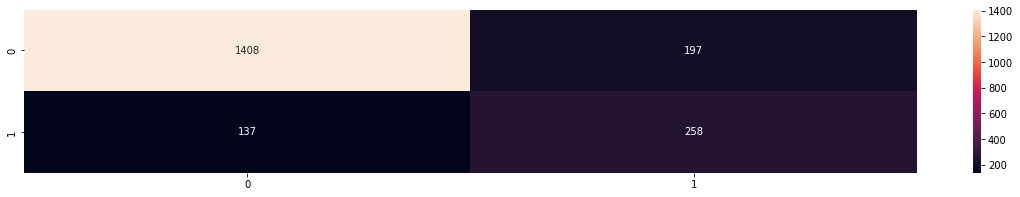

In [ ]:
cm = confusion_matrix(y_test,gb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

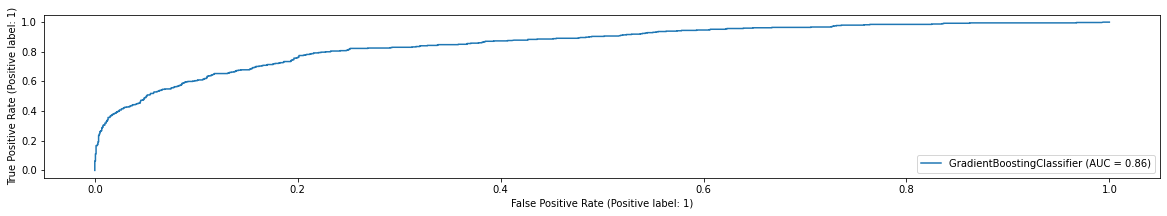

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(gb, X_test, y_test)
plt.show()

# LGBM

In [ ]:
import timeit
start_time = timeit.default_timer()
lgbmc = LGBMClassifier(random_state=3)


param_grid = {'num_leaves': [5, 10],'learning_rate': [0.001, 0.01],'n_estimators': [200],'feature_fraction': [0.5],'reg_alpha': [0.1, 0.5],'reg_lambda': [0.1, 0.5]}

lgbmc_clf = GridSearchCV(estimator=lgbmc, param_grid=param_grid, cv=5, verbose=False, n_jobs=-1)
best_lgbmc_clf = lgbmc_clf.fit(X_train, y_train)

print(classification_report(y_test,  best_lgbmc_clf.predict(X_test)))
print(timeit.default_timer() - start_time)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1605
           1       0.55      0.68      0.61       395

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000

16.61000674600018


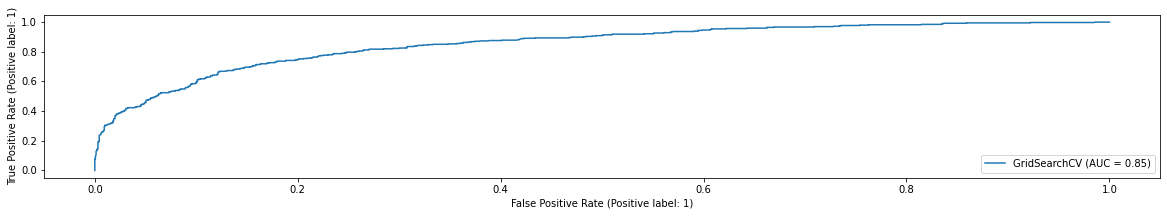

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(best_lgbmc_clf, X_test, y_test)
plt.show()

# XGBoost

In [ ]:
import timeit
start_time = timeit.default_timer()
XGB = XGBClassifier(base_score=0.5, booster='gbtree', n_estimators=100,gamma=0.04, learning_rate=0.1,max_depth=5)
XGB = XGB.fit(X_train,y_train)
print(classification_report(y_test,  XGB.predict(X_test)))
print(timeit.default_timer() - start_time)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1605
           1       0.66      0.58      0.62       395

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000

1.4212628450004559


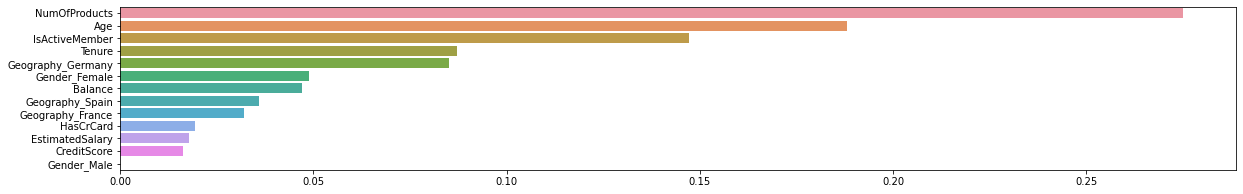

In [ ]:
feature_imp = pd.Series(XGB.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

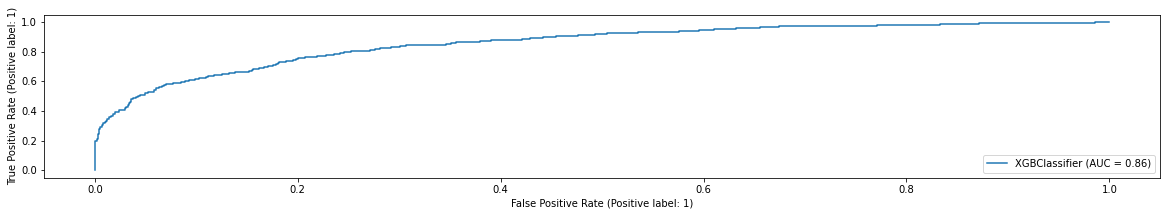

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(XGB, X_test, y_test)
plt.show()